In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

THRESHOLDING
Thresholding is a method used to separate objects from the background in an image
It checks the brightness (pixel value) of each pixel.
If a pixel is darker than a certain threshold, it's set to black (0).
If a pixel is brighter, it's set to white (255).
t helps in:
Object detection
Segmentation (separating parts of an image)
Preprocessing for edge or contour detection
Binary Thresholding :
Pixels below the threshold → 0 (black)
Pixels above the threshold → 255 (white)

Adaptive Mean Thresholding:
Calculates a different threshold for different parts of the image using local neighborhood.

Otsu’s Thresholding :
Automatically finds the best threshold value by analyzing the image histogram.
src: The input image
thresh: The threshold value
maxval: The value to assign (usually 255)
type: Type of thresholding (like binary, inverse, Otsu)

If pixel value > threshold → set to 0 (black)
If pixel value ≤ threshold → set to 255 (white)


In [ ]:
def binary_thresholding(image, threshold_value = 127, max_value =255):
  ret ,thresh1 = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)
  return thresh1


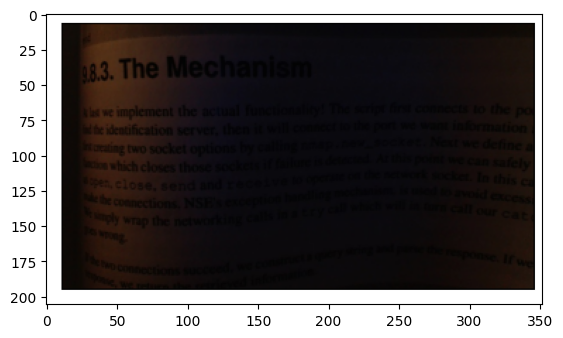

In [ ]:
mechanism = cv2.imread("/content/demo_img.png")
mechanism_rgb = cv2.cvtColor(mechanism,cv2.COLOR_BGR2RGB)
plt.imshow(mechanism_rgb)
plt.show()

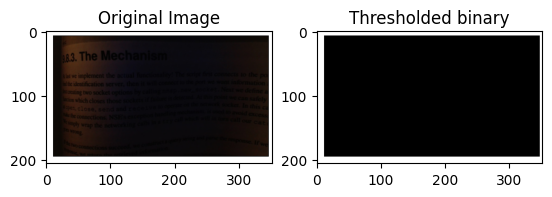

In [ ]:
image_thresh = binary_thresholding(mechanism_rgb)
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(mechanism_rgb)
plt.subplot(1,2,2)
plt.title("Thresholded binary")
plt.imshow(image_thresh)
plt.show()

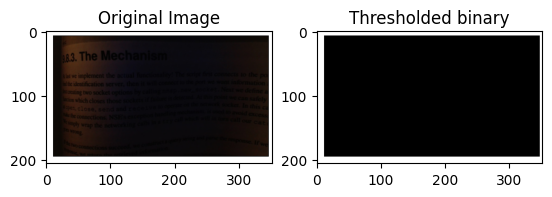

In [ ]:
gray = cv2.cvtColor(mechanism_rgb, cv2.COLOR_RGB2GRAY)
image_thresh=binary_thresholding(gray)
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(mechanism_rgb)
plt.subplot(1,2,2)
plt.title("Thresholded binary")
plt.imshow(image_thresh,cmap='gray')
plt.show()

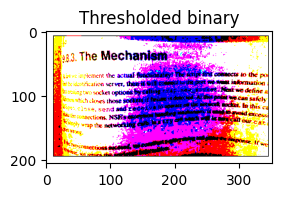

In [ ]:
image_thresh = binary_thresholding(mechanism_rgb , 10 , 255)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,1)
plt.imshow(image_thresh)
plt.title("Thresholded binary")
plt.show()

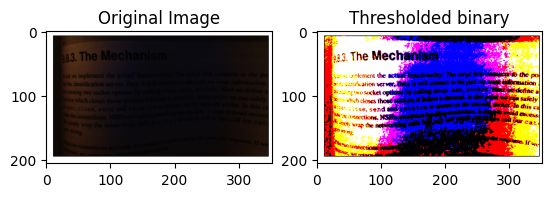

In [ ]:
image_thresh = binary_thresholding(mechanism_rgb, 12, 255)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_thresh)
plt.title("Thresholded binary")
plt.show()

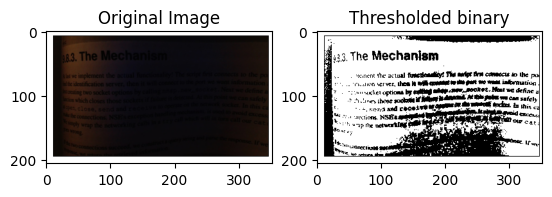

In [ ]:
gray = cv2.cvtColor(mechanism_rgb,cv2.COLOR_BGR2GRAY)
image_thresh = binary_thresholding(gray, 10, 255)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_thresh,cmap='gray')
plt.title("Thresholded binary")
plt.show()

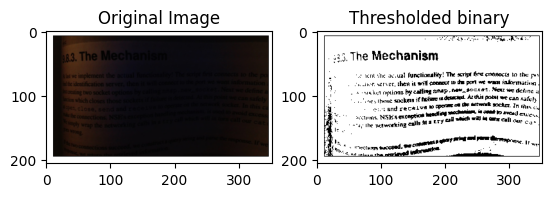

In [ ]:
gray = cv2.cvtColor(mechanism_rgb,cv2.COLOR_BGR2GRAY)
image_thresh = binary_thresholding(gray, 8, 255)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_thresh,cmap='gray')
plt.title("Thresholded binary")
plt.show()

Adaptive thresholding
Unlike basic thresholding (which uses one fixed value for the whole image), adaptive thresholding chooses a different threshold for each pixel, based on its local neighborhood.

It’s useful when the lighting in the image is uneven or not consistent — for example:
One part of the image is bright
Another part is dark
 #How It Works (Simplified):
Take a small block (e.g., 11×11 pixels) around each pixel.
Calculate the average or weighted sum of that block.
Use that as the threshold for the center pixel.
Repeat for every pixel — result: custom threshold per region.

#Result:
Text becomes clearer even if lighting changes across the image.
Good for scanned documents, shadowed photos, etc.

In [ ]:
def adaptive_mean_thresholding(img, max_value=255, block_size =11 , C_dst = 2):
   th = cv2.adaptiveThreshold(img, max_value, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY , block_size, C_dst)
   return th

img: The grayscale image to be thresholded.
max_Value: The value to assign to pixels that meet the threshold condition (usually 255, meaning white).
blok_size: Size of the neighborhood around each pixel. Must be an odd number (e.g., 3, 5, 11).
C_dst: A constant subtracted from the local mean to calculate the threshold. This adjusts how strict the threshold is.



Text(0.5, 1.0, 'Thresholded binary')

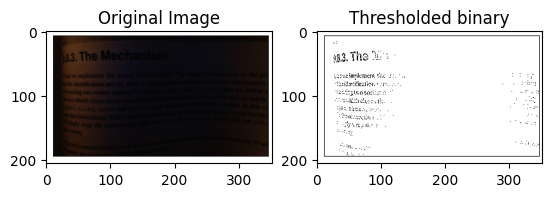

In [ ]:
img_gray = cv2.cvtColor(mechanism_rgb,cv2.COLOR_BGR2GRAY)
image_mean_thresh = adaptive_mean_thresholding(img_gray, 255 , 3, 5)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_mean_thresh,cmap='gray')
plt.title("Thresholded binary")


Text(0.5, 1.0, 'Thresholded binary')

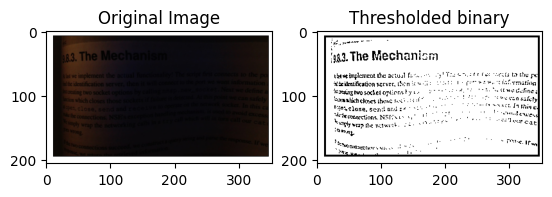

In [ ]:
img_gray = cv2.cvtColor(mechanism_rgb,cv2.COLOR_BGR2GRAY)
th2 = adaptive_mean_thresholding(img_gray, 255, 7, 4)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(th2,cmap='gray')
plt.title("Thresholded binary")

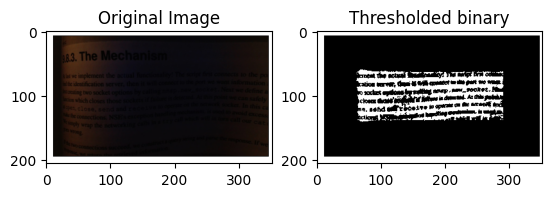

In [ ]:
img_gray = cv2.cvtColor(mechanism_rgb,cv2.COLOR_BGR2GRAY)
th2 = adaptive_mean_thresholding(img_gray, 255,115, 1)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(th2,cmap='gray')
plt.title("Thresholded binary")
plt.show()

In [ ]:
# thresholding
def otsu_thresholding(image, value = 0, m = 255):
    return cv2.threshold(image, value, m, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


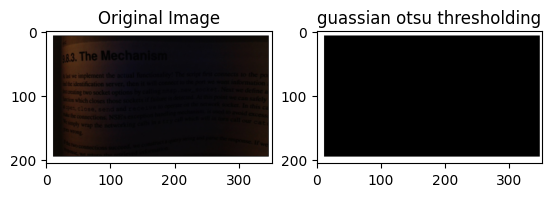

In [ ]:
img_gray = cv2.cvtColor(mechanism_rgb,cv2.COLOR_BGR2GRAY)
image_otsu_thresh = otsu_thresholding(img_gray , 125, 255)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_otsu_thresh,cmap='gray')
plt.title("guassian otsu thresholding")
plt.show()

# otsu thresholdinng
Otsu's thresholding is a smart method to automatically choose the best threshold value for converting a grayscale image into a binary (black and white) image.



In [ ]:
def gaussian_blur(img, kernel=(3, 3), sigmaX=0, sigmaY=0):
    return cv2.GaussianBlur(img, kernel, sigmaX, sigmaY)

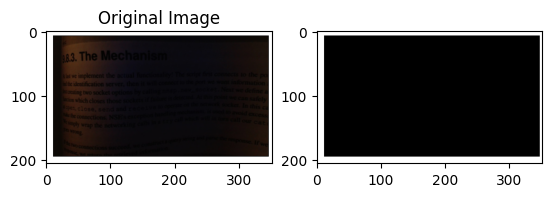

In [ ]:
blur = gaussian_blur(mechanism_rgb)
img_gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
image_otsu_thresh = otsu_thresholding(img_gray , 0, 200)
plt.subplot(1,2,1)
plt.imshow(mechanism_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_otsu_thresh,cmap='gray')


#MORPHOLOGICAL TRANSFORMATION
These are operations that process images based on their shapes.
Used mostly on binary images (black & white).
They clean up noise, fill gaps, and highlight structures.
Requires a kernel (small shape/mask like a square or circle) to define how pixels are changed.Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play.

closing
opening
dilation
erosion
gradient
top hat
black hat



Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object
It is useful for removing small white noises.
Used to detach two connected objects etc.

In [ ]:
def erode(image, kernel=(5, 5), iterations=1):

    return cv2.erode(image, np.ones(kernel,np.uint8), iterations)

image:
The input binary or grayscale image (white = object, black = background).

kernel=(5, 5):
This is the structuring element — a small square shape used to check neighborhoods.

np.ones(kernel, np.uint8) creates a 5×5 matrix of 1s, like:

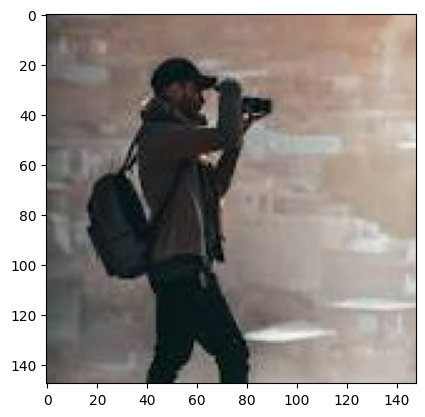

In [ ]:
cameraman = cv2.imread("/content/cameramen.jpeg")
cameraman_rgb = cv2.cvtColor(cameraman,cv2.COLOR_BGR2RGB)
plt.imshow(cameraman_rgb)
plt.show()

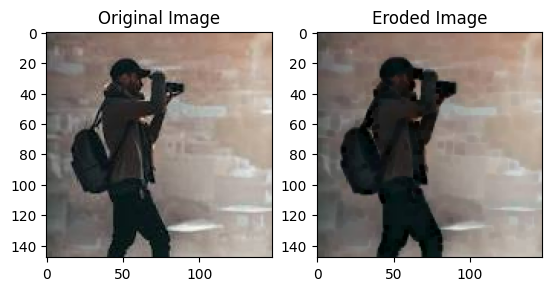

In [ ]:
image_erosion = erode(  cameraman_rgb, (3,3), 1)
plt.subplot(1,2,1)
plt.imshow(cameraman_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_erosion)
plt.title("Eroded Image")
plt.show()

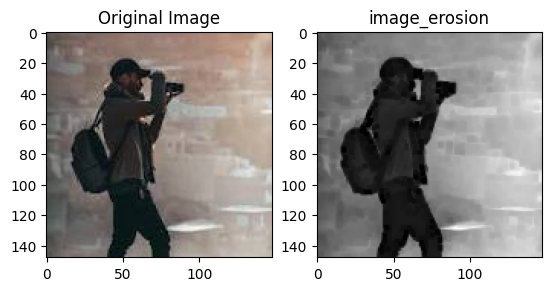

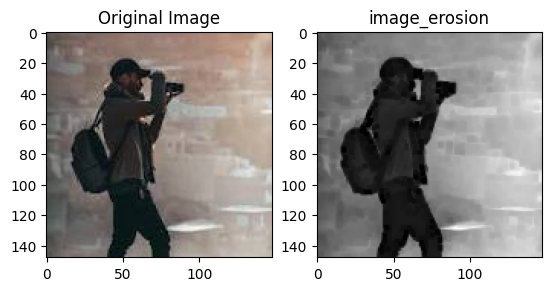

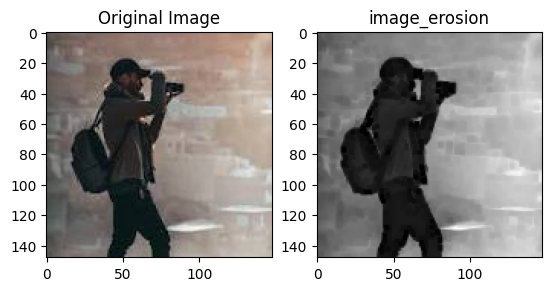

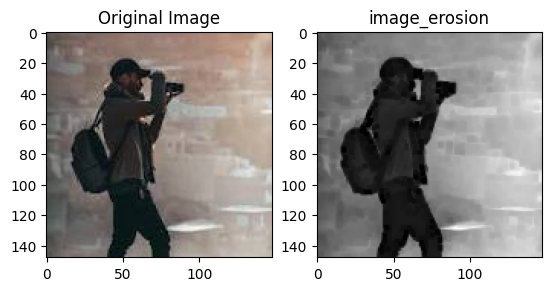

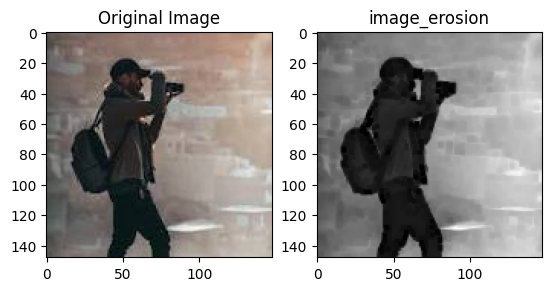

In [ ]:
for i in range(1,6):
  image = cv2.cvtColor(cameraman_rgb,cv2.COLOR_BGR2GRAY)
  image_erosion = erode(image, (3,3), i)
  plt.subplot(1,2,1)
  plt.title("Original Image")
  plt.imshow(cameraman_rgb)
  plt.subplot(1,2,2)
  plt.title("image_erosion")
  plt.imshow(image_erosion,cmap='gray')
  plt.show()

Dilation
Dilation is the opposite of erosion. It adds white pixels to the edges of objects in a binary image, causing them to grow (expand outward).
Erosion removes small white dots (noise), but also shrinks the object.

Dilation brings the object back to normal size without bringing noise back.



In [ ]:
# dilation
def dilation(image, kernel=(5, 5), iterations=1):
    return cv2.dilate(image, np.ones(kernel, np.uint8), iterations)
#

Text(0.5, 1.0, 'Dilated Image')

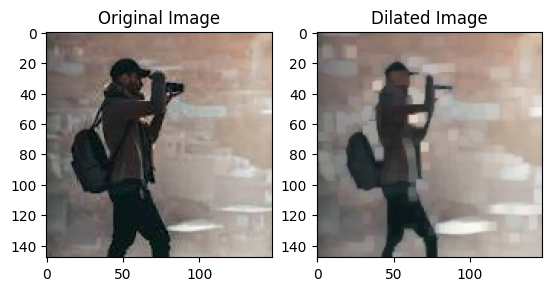

In [ ]:
image_dilation = dilation(cameraman_rgb)
plt.subplot(1,2,1)
plt.imshow(cameraman_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_dilation)
plt.title("Dilated Image")

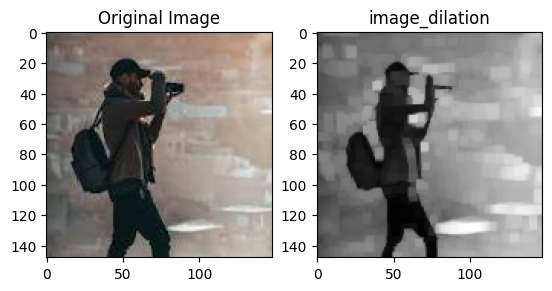

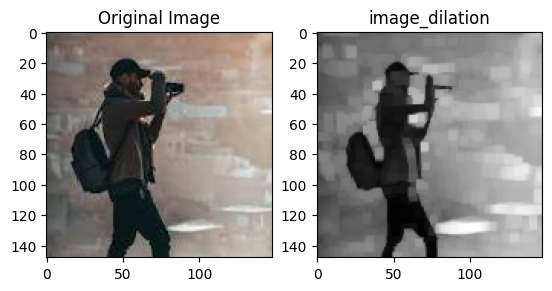

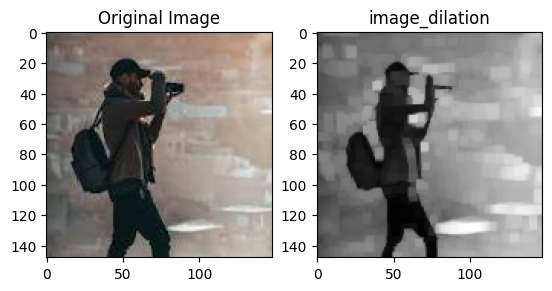

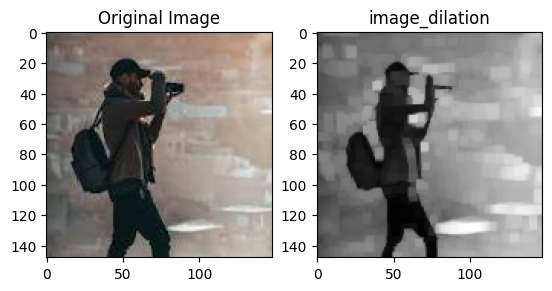

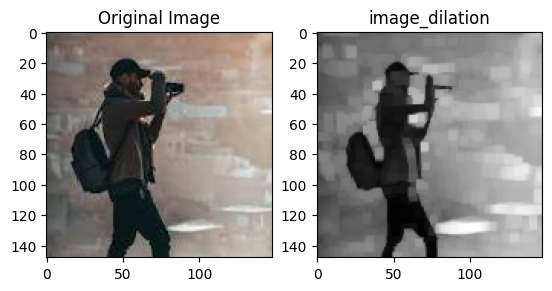

In [ ]:
for i in range(1,6):
  gray = cv2.cvtColor(cameraman_rgb,cv2.COLOR_BGR2GRAY)
  image_dilation = dilation(gray,iterations=i)
  plt.subplot(1,2,1)
  plt.title("Original Image")
  plt.imshow(cameraman_rgb)
  plt.subplot(1,2,2)
  plt.title("image_dilation")
  plt.imshow(image_dilation,cmap='gray')
  plt.show()

**Opening**
Opening is just another name of erosion followed by dilation


In [ ]:
# opening -erosion by dilation
# opening -good for removing noise
def opening(image, kernel=(5,5)):
   return cv2.morphologyEx(image , cv2.MORPH_OPEN, kernel=np.ones(kernel, np.uint8))


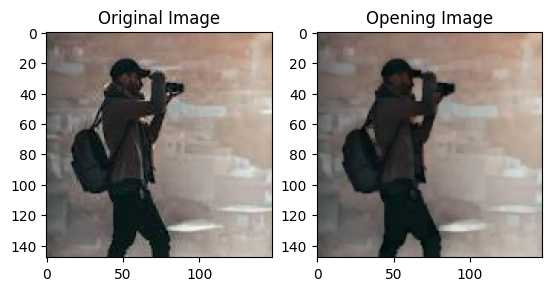

In [ ]:
image_opening = opening(cameraman_rgb, (3,3))
plt.subplot(1,2,1)
plt.imshow(cameraman_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_opening , cmap='gray')
plt.title("Opening Image")
plt.show()

CLOSING
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

In [ ]:
# CLOSING - good for removing noise
def closing(image, kernel = (5,5)):
     closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel=np.ones(kernel, np.uint8))
     return closing


<function matplotlib.pyplot.show(close=None, block=None)>

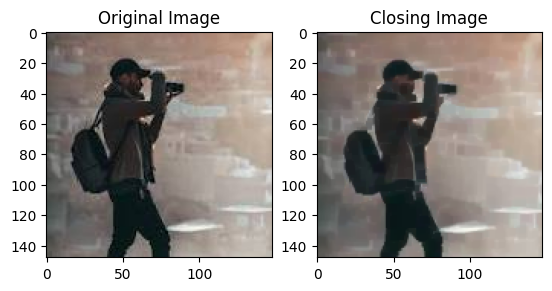

In [ ]:
image_closing = closing(cameraman_rgb, (4,4))
plt.subplot(1,2,1)
plt.imshow(cameraman_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_closing , cmap='gray')
plt.title("Closing Image")
plt.show

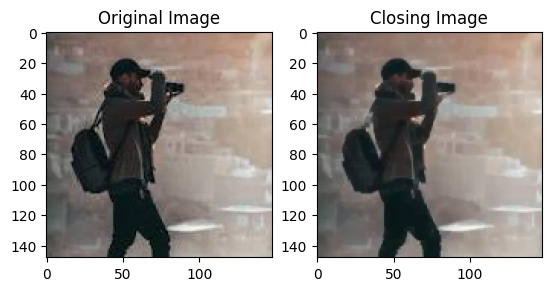

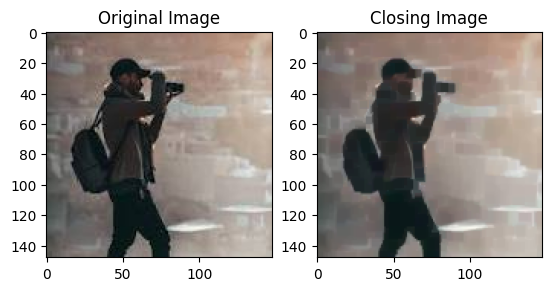

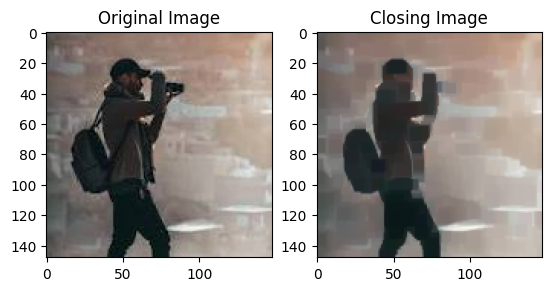

In [ ]:
kernel_sizes = [(3,3), (5,5) ,(7,7)]
for k_s in kernel_sizes:
  image_closin= closing(cameraman_rgb, k_s)
  plt.subplot(1,2,1)
  plt.imshow(cameraman_rgb)
  plt.title("Original Image")
  plt.subplot(1,2,2)
  plt.imshow(image_closin , cmap='gray')
  plt.title("Closing Image")
  plt.show()

MORPHOLOGICAL GRADIENT
It is the difference between dilation and erosion of an image.

In [ ]:
def morphological_gradient(image, kernel=(2, 2)):
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel=np.ones((2,2) , np.uint))
    return gradient

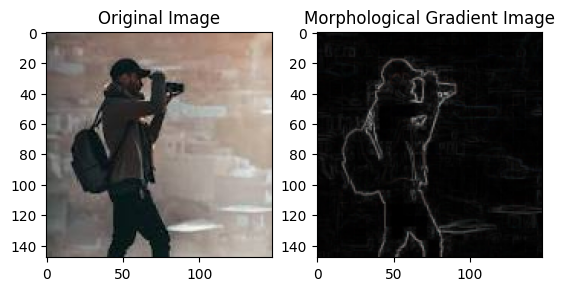

In [ ]:
image_gradient = morphological_gradient(cameraman_rgb, (5,5))
plt.subplot(1,2,1)
plt.imshow(cameraman_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_gradient , cmap='gray')
plt.title("Morphological Gradient Image")
plt.show()

  TOP HAT
It is the difference between input image and Opening of the image

In [ ]:
def top_hat(image, kernel=(5,5)):
    tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel=np.ones(kernel, np.uint8))
    return tophat

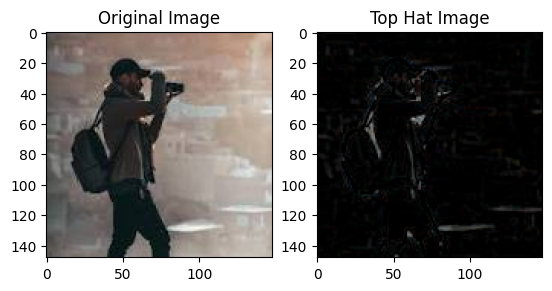

In [ ]:
image_top_hat = top_hat(cameraman_rgb)
plt.subplot(1,2,1)
plt.imshow(cameraman_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_top_hat , cmap='gray')
plt.title("Top Hat Image")
plt.show()

BLACK HATIt is the difference between the closing of the input image and input image.

In [ ]:
def black_hat(image, kernel=(4,4)):
    blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel=np.ones(kernel, np.uint8))
    return blackhat

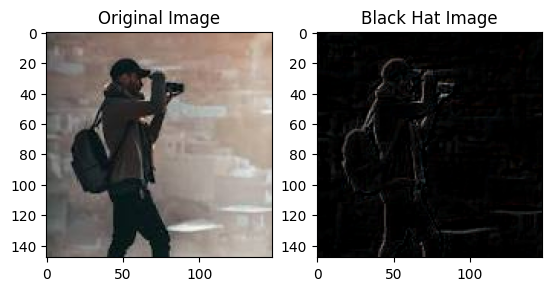

In [ ]:
image_black_hat = black_hat(cameraman_rgb)
plt.subplot(1,2,1)
plt.imshow(cameraman_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_black_hat , cmap='gray')
plt.title("Black Hat Image")
plt.show()

EDGE DETECTION
Edges are where the brightness (pixel intensity) changes quickly.

They mark the boundaries between different objects or textures.

Example: the outline of a face, a border between black and white regions.

Concept	Meaning
Edge=	Sudden change in pixel brightness
,Gradient=	How fast brightness is changing
,Sobel Filter=	A method to detect edges using gradients
,Output Image =	Highlights outlines and object borders



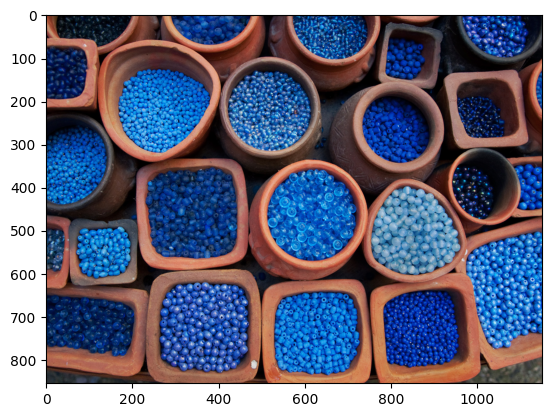

In [ ]:
blue = cv2.imread("/content/blue.jpg")
blue_rgb = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
plt.imshow(blue_rgb)
plt.show()

In [ ]:
def laplacian(image):
    lap=np.uint8(np.absolute(cv2.Laplacian(image,cv2.CV_64F,ksize = 1)))
    return lap

cv2.Laplacian(image, cv2.CV_64F, ksize=1):

Applies the Laplacian operator to the image.

cv2.CV_64F makes sure we don't lose negative values during processing.

ksize=1 means a 3×3 Laplacian kernel is used.

np.absolute():

Takes the absolute value of the result (since edges can be positive or negative changes).

np.uint8():

Converts the result to 8-bit unsigned int, which is standard for image display.



Text(0.5, 1.0, 'Laplacian Image')

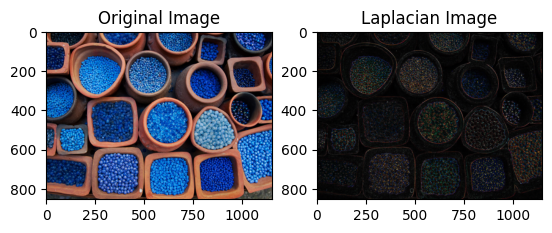

In [ ]:
image_lap = laplacian(blue_rgb)
plt.subplot(1,2,1)
plt.imshow(blue_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_lap , cmap='gray')
plt.title("Laplacian Image")

In [ ]:
# canny edge detection
def canny(image, th1 =100, th2 = 200, apertureSize=3):
    return cv2.Canny(image, threshold1 = th1, threshold2 = th2, apertureSize=apertureSize)



Canny edge detection is a powerful technique used to find edges in an image.

It’s smarter than Sobel or Laplacian because it:

Reduces noise

Finds only the most important edges

Removes weak or irrelevant edges



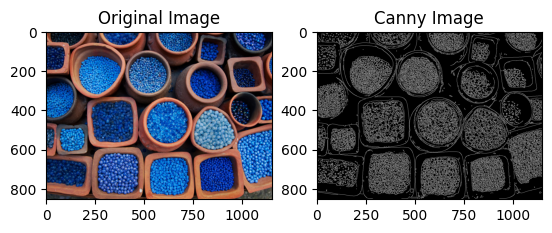

In [ ]:
image_canny = canny(blue_rgb)
plt.subplot(1,2,1)
plt.imshow(blue_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_canny , cmap='gray')
plt.title("Canny Image")
plt.show()

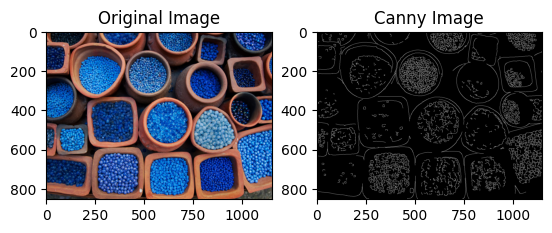

In [ ]:
gray = cv2.cvtColor(blue_rgb,cv2.COLOR_BGR2GRAY)
blurred = gaussian_blur(gray,(5,5))
dilated = dilation(blurred)
image_canny = canny(dilated)
plt.subplot(1,2,1)
plt.imshow(blue_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_canny , cmap='gray')
plt.title("Canny Image")
plt.show()

We can approximate the derivative in the X or Y direction using the Sobel function, here are the parameters:
src: input image

ddepth: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives

dx: order of the derivative x

dx: order of the derivative y

ksize size of the extended Sobel kernel; it must be 1, 3, 5, or 7

dx = 1 represents the derivative in the x-direction. The function approximates the derivative by convolving the image with the following kernel

In [ ]:
#Extract sobel Edeges
def sobel(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # sobel image gradient
  vertical = np.uint8(np.absolute(cv2.Sobel(image,cv2.CV_64F,1,0,ksize = 1)))
  horizon = np.uint8(np.absolute(cv2.Sobel(image,cv2.CV_64F,0,1,ksize = 1)))
  Sobel = cv2.bitwise_or(vertical, horizon)

   #sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    #sobely = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    #sobelxy = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
    #sobel_OR = cv2.bitwise_or(sobelx, sobely)
  return vertical, horizon, Sobel


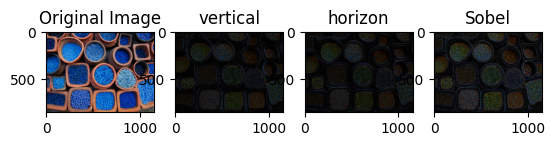

In [ ]:
image = cv2.cvtColor(blue_rgb,cv2.COLOR_BGR2GRAY)
vertical, horizon, Sobel = sobel(blue_rgb)
plt.subplot(1,4,1)
plt.imshow(blue_rgb)
plt.title("Original Image")
plt.subplot(1,4,2)
plt.imshow(vertical , cmap='gray')
plt.title("vertical")
plt.subplot(1,4,3)
plt.imshow(horizon , cmap='gray')
plt.title("horizon")
plt.subplot(1,4,4)
plt.imshow(Sobel , cmap='gray')
plt.title("Sobel")
plt.show()

TRANSFORMATION
In image processing, transformation means changing the position, size, orientation, or shape of an image. This is useful for:

Aligning images

Zooming or rotating

Warping to fix distortion

Preparing for object detection or recognition



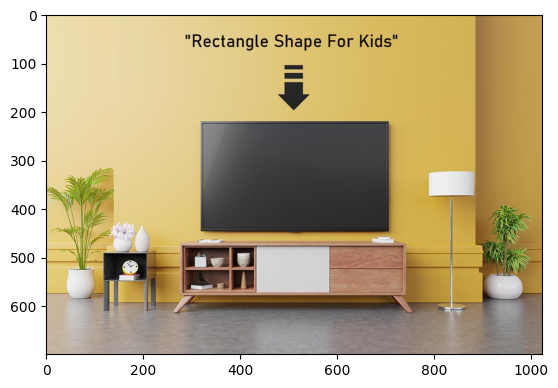

In [ ]:
card = cv2.imread("/content/Introducing-Rectangle-Shape.jpg")
card_rgb = cv2.cvtColor(card, cv2.COLOR_BGR2RGB)
plt.imshow(card_rgb)
plt.show()

In [ ]:
def resize(pic):
    img = pic.copy()
    scale_percent = 500/img.shape[0]
    width = int(img.shape[1]*scale_percent)
    height = int(img.shape[0]*scale_percent)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [ ]:
card = resize(card_rgb)

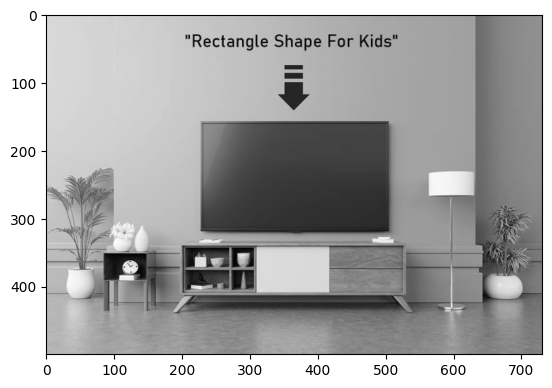

In [ ]:
gray = cv2.cvtColor(card, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

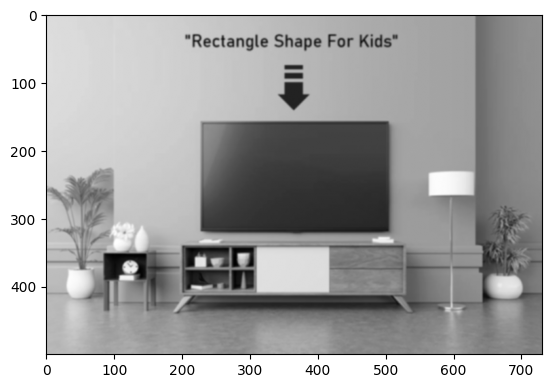

In [ ]:
# Get rid of noise with Gaussian filter
blurred = gaussian_blur(gray,(5,5))
plt.imshow(blurred, cmap='gray')
plt.show()

In [ ]:
def detect_white_region(blurred_image, kernel=(3,3)):
    # Detect white regions
    #next find region in the image that are light
    squareKernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel)
    dilated = cv2.dilate(blurred, squareKernel)
    edge = canny(dilated)
    plt.imshow(edge, cmap='gray')
    plt.show()
    return edge

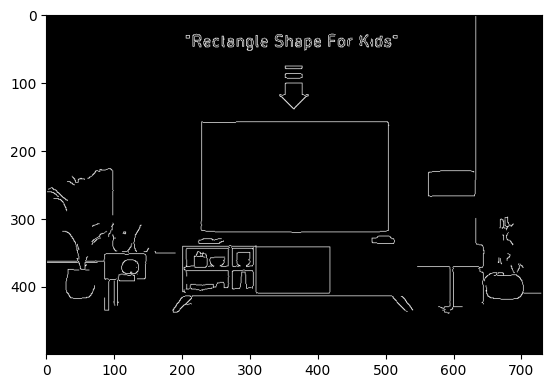

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
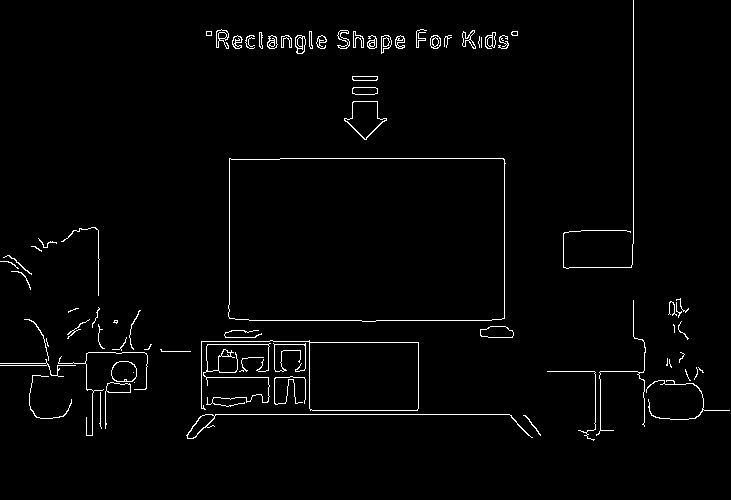

In [ ]:
detect_white_region(blurred, (3,3))

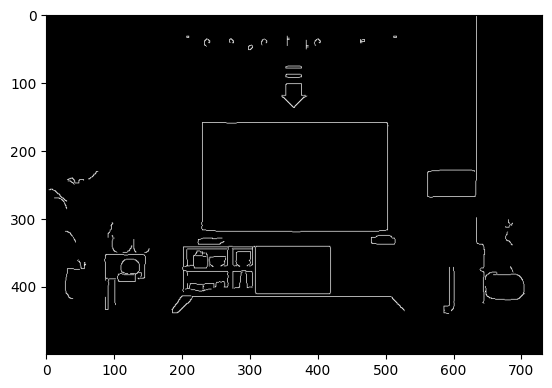

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
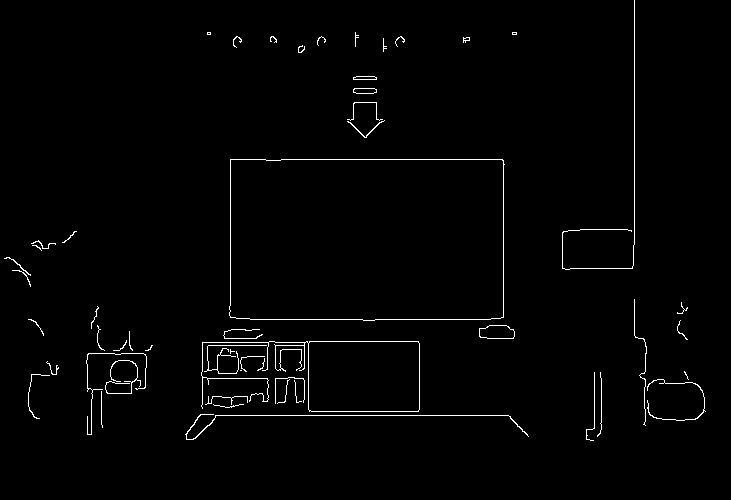

In [ ]:
detect_white_region(blurred, (5,5))

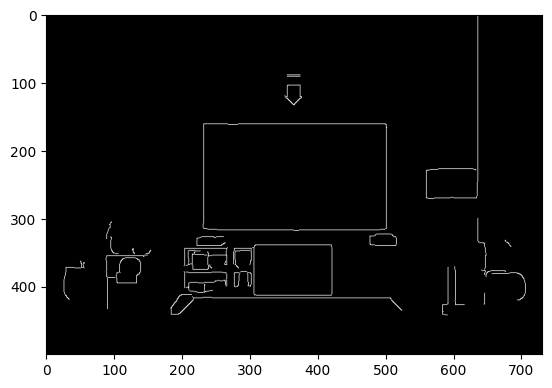

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
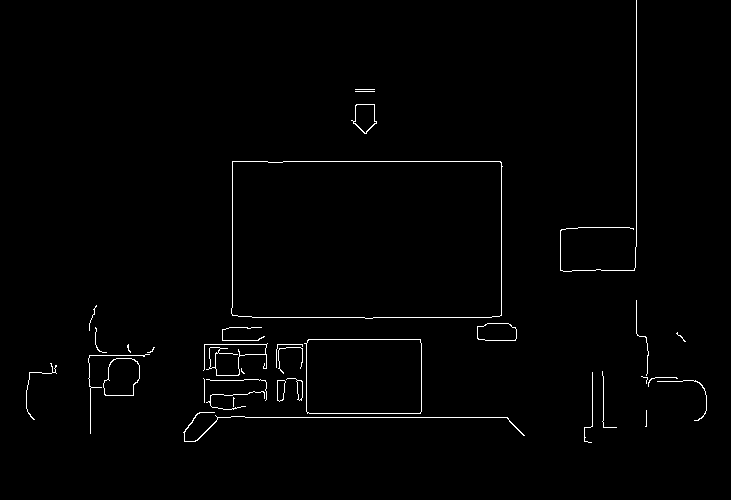

In [ ]:
detect_white_region(blurred, (9,9))

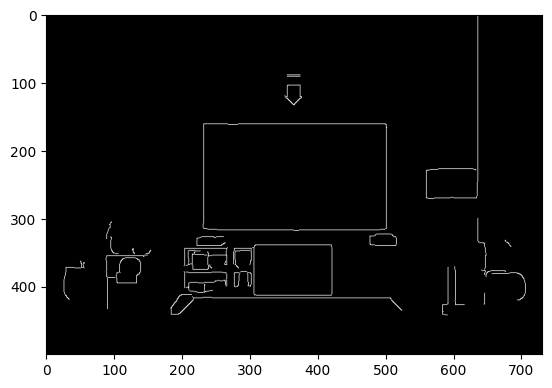

In [ ]:
edged = detect_white_region(blurred, (9,9))

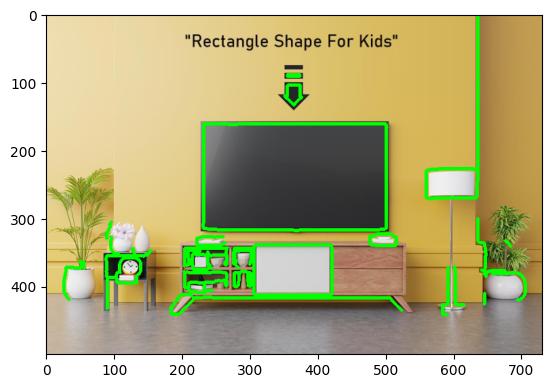

In [ ]:
# Detect all contours in canny_edge image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(card.copy(), contours, -1, (0, 255,0), 3)
plt.imshow(image_with_contours)
plt.show()

edged: This is the Canny-edged image (binary image with white edges).

cv2.RETR_TREE: Retrieves all contours and reconstructs the full hierarchy (parent-child relationships).

cv2.CHAIN_APPROX_SIMPLE: Compresses horizontal, vertical, and diagonal points (faster, fewer points).

contours: A list of detected contours (each is an array of points).

hierarchy: Info about the nesting of contours (useful for complex objects).



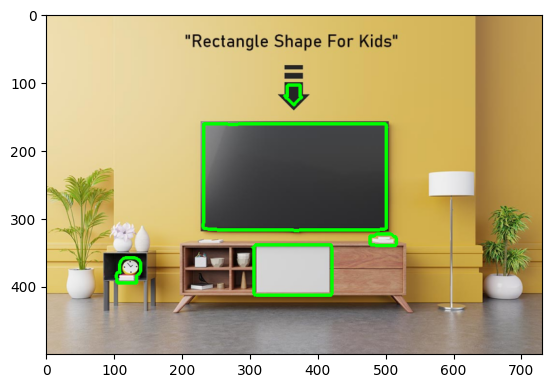

In [ ]:
# GEt 10 largest contours
largest_contours = sorted(contours,key=cv2.contourArea, reverse=True)[:10]
image_with_largest_counters = cv2.drawContours(card.copy(), largest_contours, -1, (0,255,0), 3)
plt.imshow(image_with_largest_counters)
plt.show()

In [ ]:
# 0.02*per
#0.03*per
#0.031*peri
#0.032*peri
def approximate_contour(contour):
  #contour = np.array(contour)
  perimeter =  cv2.arcLength(contour, True)

  approximatedShape = cv2.approxPolyDP(contour, 0.050*perimeter, True)
  return approximatedShape


In [ ]:
def contour_4(contours):
  for contour in contours:
    polygon_shape = approximate_contour(contour)
    # len(contour) =  4 #rectangle
    if len(polygon_shape)==4:
      return polygon_shape

In [ ]:
rec_contour = contour_4(largest_contours)
print(rec_contour)

[[[232 161]]

 [[232 315]]

 [[501 315]]

 [[500 161]]]


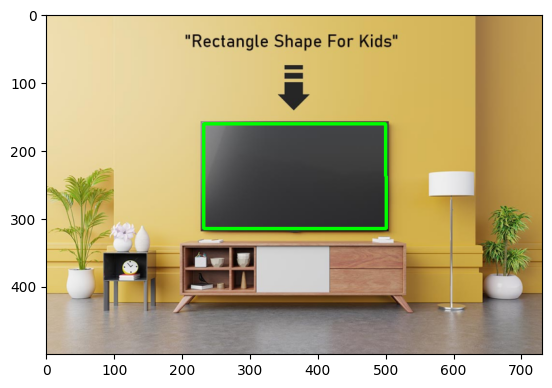

In [ ]:
image_with_rec_contour = cv2.drawContours(card.copy(),[rec_contour], -1, (0,255,0), 3)
plt.imshow(image_with_rec_contour)
plt.show()

In [ ]:
def con_rect(rec_contour, ratio):
    # now that we have our screen contour, we need to determine
    # the top-left, top-right, bottom-right, and bottom-left
    # points so that we can later warp the image -- we'll start
    # by reshaping our contour to be our finals and initializing
    # our output rectangle in top-left, top-right, bottom-right,
    # and bottom-left order
    pts = rec_contour.reshape(4, 2).astype("float32")
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point has the smallest sum whereas the
    # bottom-right has the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
     # compute the difference between the points -- the top-right
    # will have the minumum difference and the bottom-left will
    # have the maximum difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # multiply the rectangle by the original ratio
    rect /= ratio

    return rect

In [ ]:
rect=con_rect(rec_contour, 500/card.shape[0])
print(rect)

[[232. 161.]
 [500. 161.]
 [501. 315.]
 [232. 315.]]


In [ ]:
def warp_prespective(original_image, rect):
    # now that we have our rectangle of points, let's compute
    # the width of our new image
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    # ...and now for the height of our new image
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    # take the maximum of the width and height values to reach
    # our final dimensions
    maxWidth = max(int(widthA), int(widthB))
    maxHeight = max(int(heightA), int(heightB))
    # construct our destination points which will be used to
    # map the screen to a top-down, "birds eye" view
    dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")
    # calculate the perspective transform matrix and warp
    # the perspective to grab the screen
    M = cv2.getPerspectiveTransform(rect, dst)
    warp = cv2.warpPerspective(original_image.copy(), M, (maxWidth, maxHeight))

    return warp


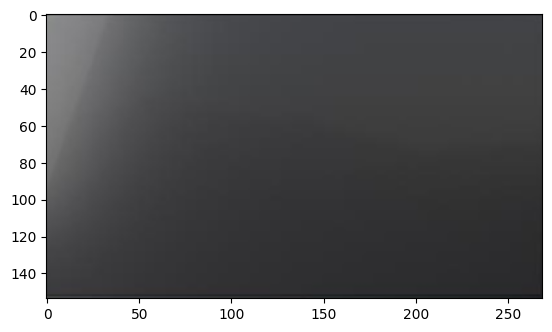

In [ ]:
warp = warp_prespective(card, rect)
plt.imshow(warp)
plt.show()